<a href="https://colab.research.google.com/github/Soomin-Maxwell/Medical_AI_study/blob/main/Medical_Image_processing_with_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!echo "Loading data"
!pip install gdown
!gdown https://drive.google.com/uc?id=1qNpH_0BEy-JJE5VMNfb8kuNN2KfsFLsi
!unzip Images.zip

Loading data
Downloading...
From: https://drive.google.com/uc?id=1qNpH_0BEy-JJE5VMNfb8kuNN2KfsFLsi
To: /content/Images.zip
7.85MB [00:00, 24.9MB/s]
Archive:  Images.zip
   creating: Images/
  inflating: Images/slice001.nii.gz  
  inflating: Images/slice002.nii.gz  
  inflating: Images/slice003.nii.gz  
  inflating: Images/slice004.nii.gz  
  inflating: Images/slice005.nii.gz  
  inflating: Images/slice006.nii.gz  
  inflating: Images/slice007.nii.gz  
  inflating: Images/slice008.nii.gz  
  inflating: Images/slice009.nii.gz  
  inflating: Images/slice010.nii.gz  
  inflating: Images/slice011.nii.gz  
  inflating: Images/slice012.nii.gz  
  inflating: Images/slice013.nii.gz  
  inflating: Images/slice014.nii.gz  
  inflating: Images/slice015.nii.gz  
  inflating: Images/slice016.nii.gz  
  inflating: Images/slice017.nii.gz  
  inflating: Images/slice018.nii.gz  
  inflating: Images/slice019.nii.gz  
  inflating: Images/slice020.nii.gz  
  inflating: Images/slice021.nii.gz  


In [2]:
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import glob

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[-8192. -8192. -8192. ... -8192. -8192. -8192.]
 [-8192. -8192. -8192. ... -8192. -8192. -8192.]
 [-8192. -8192. -8192. ... -8192. -8192. -8192.]
 ...
 [-8192. -8192. -8192. ... -8192. -8192. -8192.]
 [-8192. -8192. -8192. ... -8192. -8192. -8192.]
 [-8192. -8192. -8192. ... -8192. -8192. -8192.]]
[[-1200. -1200. -1200. ... -1200. -1200. -1200.]
 [-1200. -1200. -1200. ... -1200. -1200. -1200.]
 [-1200. -1200. -1200. ... -1200. -1200. -1200.]
 ...
 [-1200. -1200. -1200. ... -1200. -1200. -1200.]
 [-1200. -1200. -1200. ... -1200. -1200. -1200.]
 [-1200. -1200. -1200. ... -1200. -1200. -1200.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


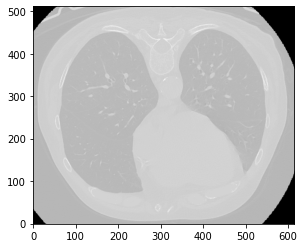

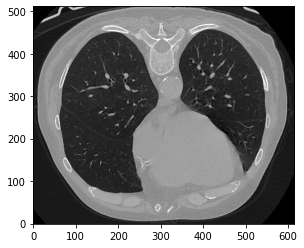

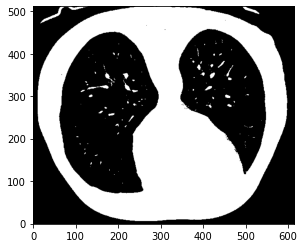

In [5]:
import cv2

#-------------------------------------

basepath = "./Images/slice*.nii.gz"
paths = sorted(glob.glob(basepath))
ct_numpy = nib.load(paths[5]).get_fdata()
print(ct_numpy)
plt.imshow(ct_numpy.T, cmap = "gray", origin = "lower")

#--------------------------------------

# lung : [ Level : -200, Window : 2000 ]
# tissue : [ Level : 50, Window :350 ]

level = -200
window = 2000

max = level + window/2 # 800
min = level - window/2 # -1200

ct_numpy = ct_numpy.clip(min,max)
print(ct_numpy)

plt.figure()
plt.imshow(ct_numpy.T, cmap = "gray", origin = "lower")

ct_numpy_2 = np.float32(ct_numpy)
ret, thres = cv2.threshold(ct_numpy_2.T, -350, 500, cv2.THRESH_BINARY)

plt.figure()
plt.imshow(cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB),cmap = "gray", origin = "lower")
print(thres)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[-125. -125. -125. ... -125. -125. -125.]
 [-125. -125. -125. ... -125. -125. -125.]
 [-125. -125. -125. ... -125. -125. -125.]
 ...
 [-125. -125. -125. ... -125. -125. -125.]
 [-125. -125. -125. ... -125. -125. -125.]
 [-125. -125. -125. ... -125. -125. -125.]]
[[-125. -125. -125. ... -125. -125. -125.]
 [-125. -125. -125. ... -125. -125. -125.]
 [-125. -125. -125. ... -125. -125. -125.]
 ...
 [-125. -125. -125. ... -125. -125. -125.]
 [-125. -125. -125. ... -125. -125. -125.]
 [-125. -125. -125. ... -125. -125. -125.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


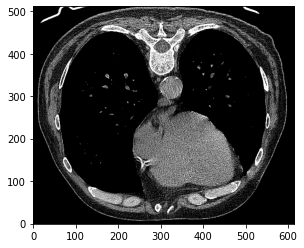

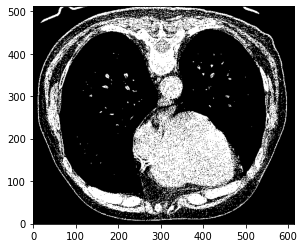

In [37]:

#-------------------------------------

basepath = "./Images/slice*.nii.gz"
paths = sorted(glob.glob(basepath))
ct_numpy = nib.load(paths[5]).get_fdata()
#print(ct_numpy)
#plt.imshow(ct_numpy.T, cmap = "gray", origin = "lower")

#--------------------------------------

# lung : [ Level : -200, Window : 2000 ]
# tissue : [ Level : 50, Window :350 ]

level = 50
window = 350

max = level + window/2 
min = level - window/2


# Windowed image 
ct_numpy = ct_numpy.clip(min,max)
print(ct_numpy)
print(ct_numpy)
plt.figure()
plt.imshow(ct_numpy.T, cmap = "gray", origin = "lower")


# Threshold image
ct_numpy_2 = np.float32(ct_numpy)
ret, thres = cv2.threshold(ct_numpy_2.T, -30, 500, cv2.THRESH_BINARY)
plt.figure()
plt.imshow(cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB),cmap = "gray", origin = "lower")
print(thres)



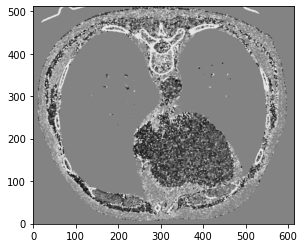

In [54]:
# Denoised image with Gaussian
ct_numpy = ct_numpy_2.T.astype('uint8')
blur = cv2.medianBlur(ct_numpy,3)
th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,1)
plt.imshow(blur, cmap = "gray", origin = "lower")
